In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output//final_data_labeled.csv')

In [3]:
# Convert the 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as the index of the dataframe
df.set_index('datetime', inplace=True)

In [10]:
# Filter the dataset for the desired date range
start_date = '2020-06-23'
end_date = '2020-06-25'
filtered_df = df[start_date:end_date]

# Create a boolean mask for the desired time range (8:00 to 12:00)
morning_start = pd.to_datetime('14:00:00').time()
morning_end = pd.to_datetime('22:00:00').time()

# Convert the index to a pandas DatetimeIndex
filtered_df.index = pd.to_datetime(filtered_df.index)

# Apply the boolean mask to the filtered DataFrame
time_mask = (filtered_df.index.time >= morning_start) & (filtered_df.index.time <= morning_end)

# Apply the boolean mask to the filtered DataFrame
filtered_df = filtered_df[time_mask]

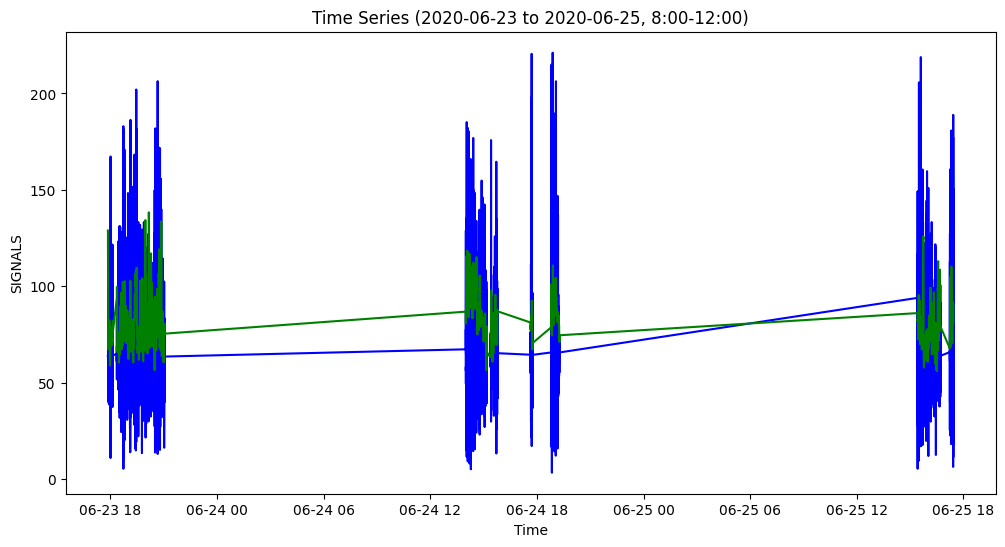

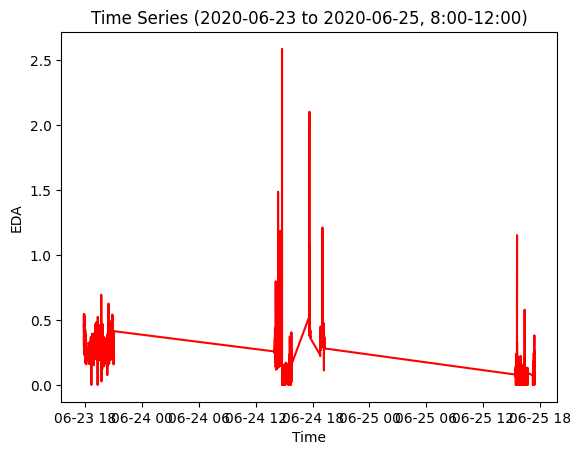

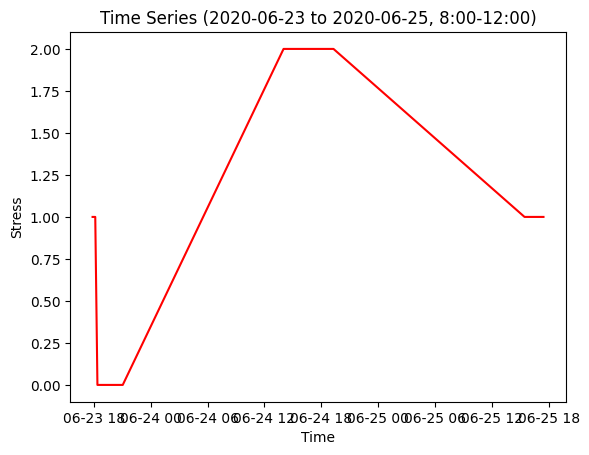

In [11]:
plt.figure(figsize=(12, 6))

features_colors = {
    'magnitude': 'blue',
    'HR': 'green'
}

# Plot each feature in the same graph with a specified color
for feature, color in features_colors.items():
    plt.plot(filtered_df.index, filtered_df[feature], label=feature, color=color)
    
plt.xlabel('Time')
plt.ylabel('SIGNALS')
plt.title(f'Time Series ({start_date} to {end_date}, 8:00-12:00)')
plt.show()

plt.plot(filtered_df.index, filtered_df['EDA'], label=feature, color='red')
plt.xlabel('Time')
plt.ylabel('EDA')
plt.title(f'Time Series ({start_date} to {end_date}, 8:00-12:00)')
plt.show()

plt.plot(filtered_df.index, filtered_df['label'], label=feature, color='red')
plt.xlabel('Time')
plt.ylabel('Stress')
plt.title(f'Time Series ({start_date} to {end_date}, 8:00-12:00)')
plt.show()